In [1]:
RA=211.181999999333
DEC=-14.9809999994415
coords=str(RA)+' '+str(DEC)

In [2]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.ned.core import RemoteServiceError
from astropy.table import Table
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

import pandas as pd

In [3]:
obs_table = Observations.query_region(coords,radius=5*u.arcsec)
print(obs_table[10:11])

intentType obs_collection provenance_name ... srcDen    obsid    distance
---------- -------------- --------------- ... ------ ----------- --------
   science           HLSP           K2SFF ...    nan 18001872655      0.0


In [4]:
obsid1 = '18001872655'
data_products = Observations.get_product_list(obsid1)
manifest = Observations.download_products(data_products)

INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_correction.png with expected size 12934. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_image.png with expected size 6842. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_medians.png with expected size 3462. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_skypos.png with expected size 7285. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc.png with expected size 28993. [astroquery

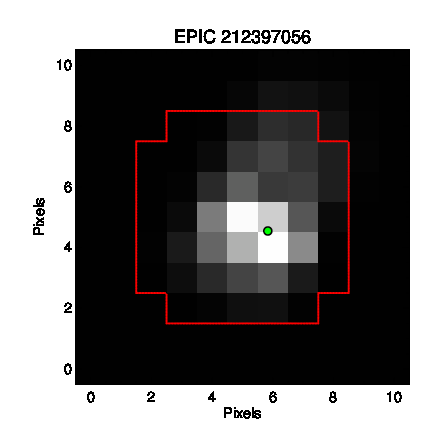

In [5]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_image.png')

Some interesting data representation. 

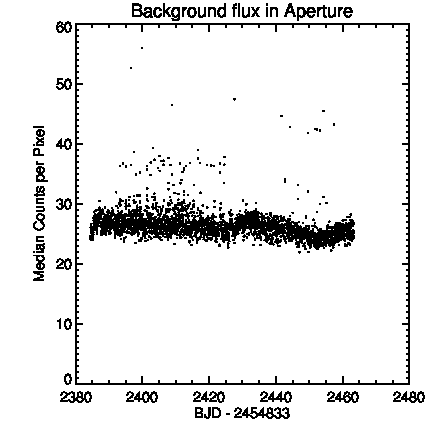

In [6]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_medians.png')

The **"Corrected 6 hour precision"** has all of the corrections done and is best representative of what actually would have been received. 

Flux is relative to the mean. 

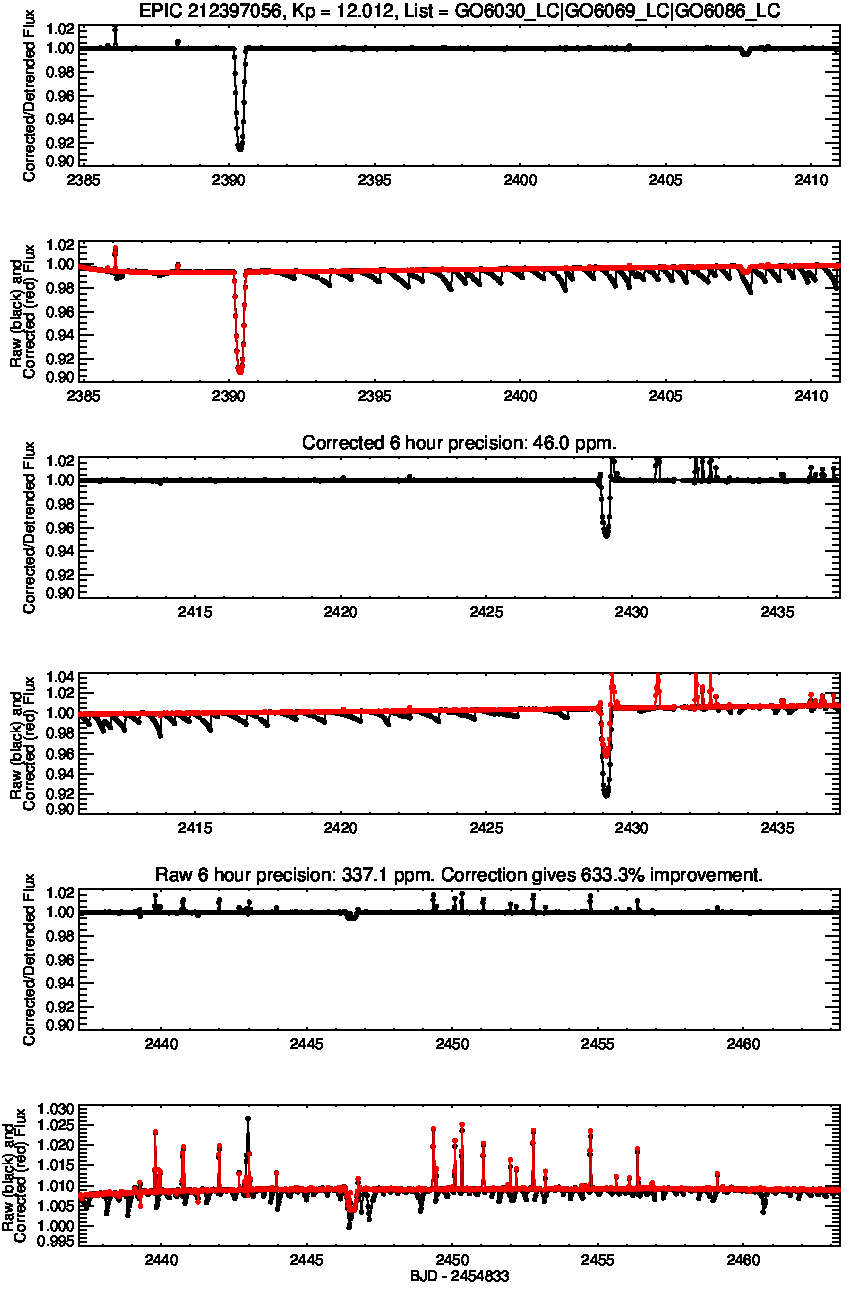

In [7]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc.png')

In [8]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200811 12:10:27 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200811 12:10:27 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


[I 200811 12:10:27 utils:141] NumExpr defaulting to 6 threads.


Text(0, 0.5, 'Flux')

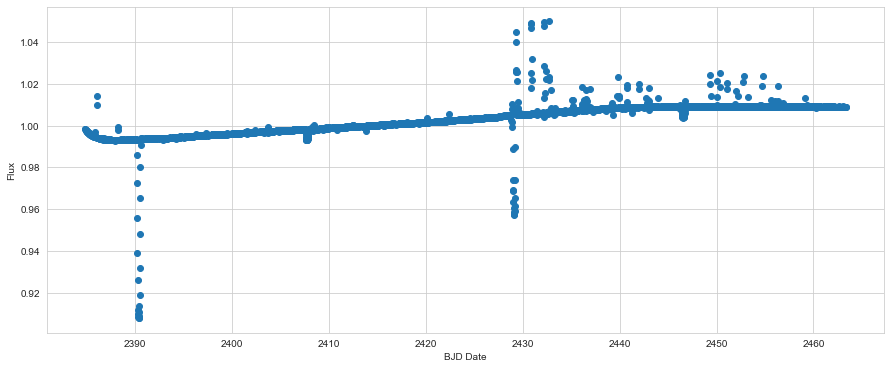

In [9]:
%matplotlib inline 
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))

df=pd.read_csv('mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc-default-aper.txt', sep=",",skiprows=1,header=None,names=['times','fluxes','extra'])
df['errs']=df['fluxes']*0.01
df=df.drop(columns=['extra'])
dates=df['times'].to_numpy()
fluxes=df['fluxes'].to_numpy()
errs=df['errs'].to_numpy()

plt.scatter(dates,fluxes)
plt.xlabel('BJD Date')
plt.ylabel('Flux')

In [10]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs,magsarefluxes=True)

[I 200811 12:10:28 zgls:597] using autofreq with 3920 frequency points, start P = 0.100, end P = 78.499
[I 200811 12:10:28 zgls:607] using 6 workers...


In [11]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs, magsarefluxes=True)

[I 200811 12:10:31 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.58023, reduced chisq = 0.04401
[I 200811 12:10:31 png:696] plotting phased LC with period 78.499265, epoch 2389.26550
[I 200811 12:10:31 nonphysical:216] spline fit done. nknots = 30,  chisq = 1126.51138, reduced chisq = 0.33142
[I 200811 12:10:31 png:696] plotting phased LC with period 39.249632, epoch 2428.39276
[I 200811 12:10:31 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.73424, reduced chisq = 0.04404
[I 200811 12:10:31 png:696] plotting phased LC with period 156.998530, epoch 2389.10204
[I 200811 12:10:31 nonphysical:216] spline fit done. nknots = 30,  chisq = 820.34369, reduced chisq = 0.24128
[I 200811 12:10:31 png:696] plotting phased LC with period 65.416054, epoch 2400.03330
[I 200811 12:10:31 nonphysical:216] spline fit done. nknots = 30,  chisq = 1126.51138, reduced chisq = 0.33142
[I 200811 12:10:31 png:696] plotting phased LC with period 39.249632, epoch 2428.39276
[I 200811 12

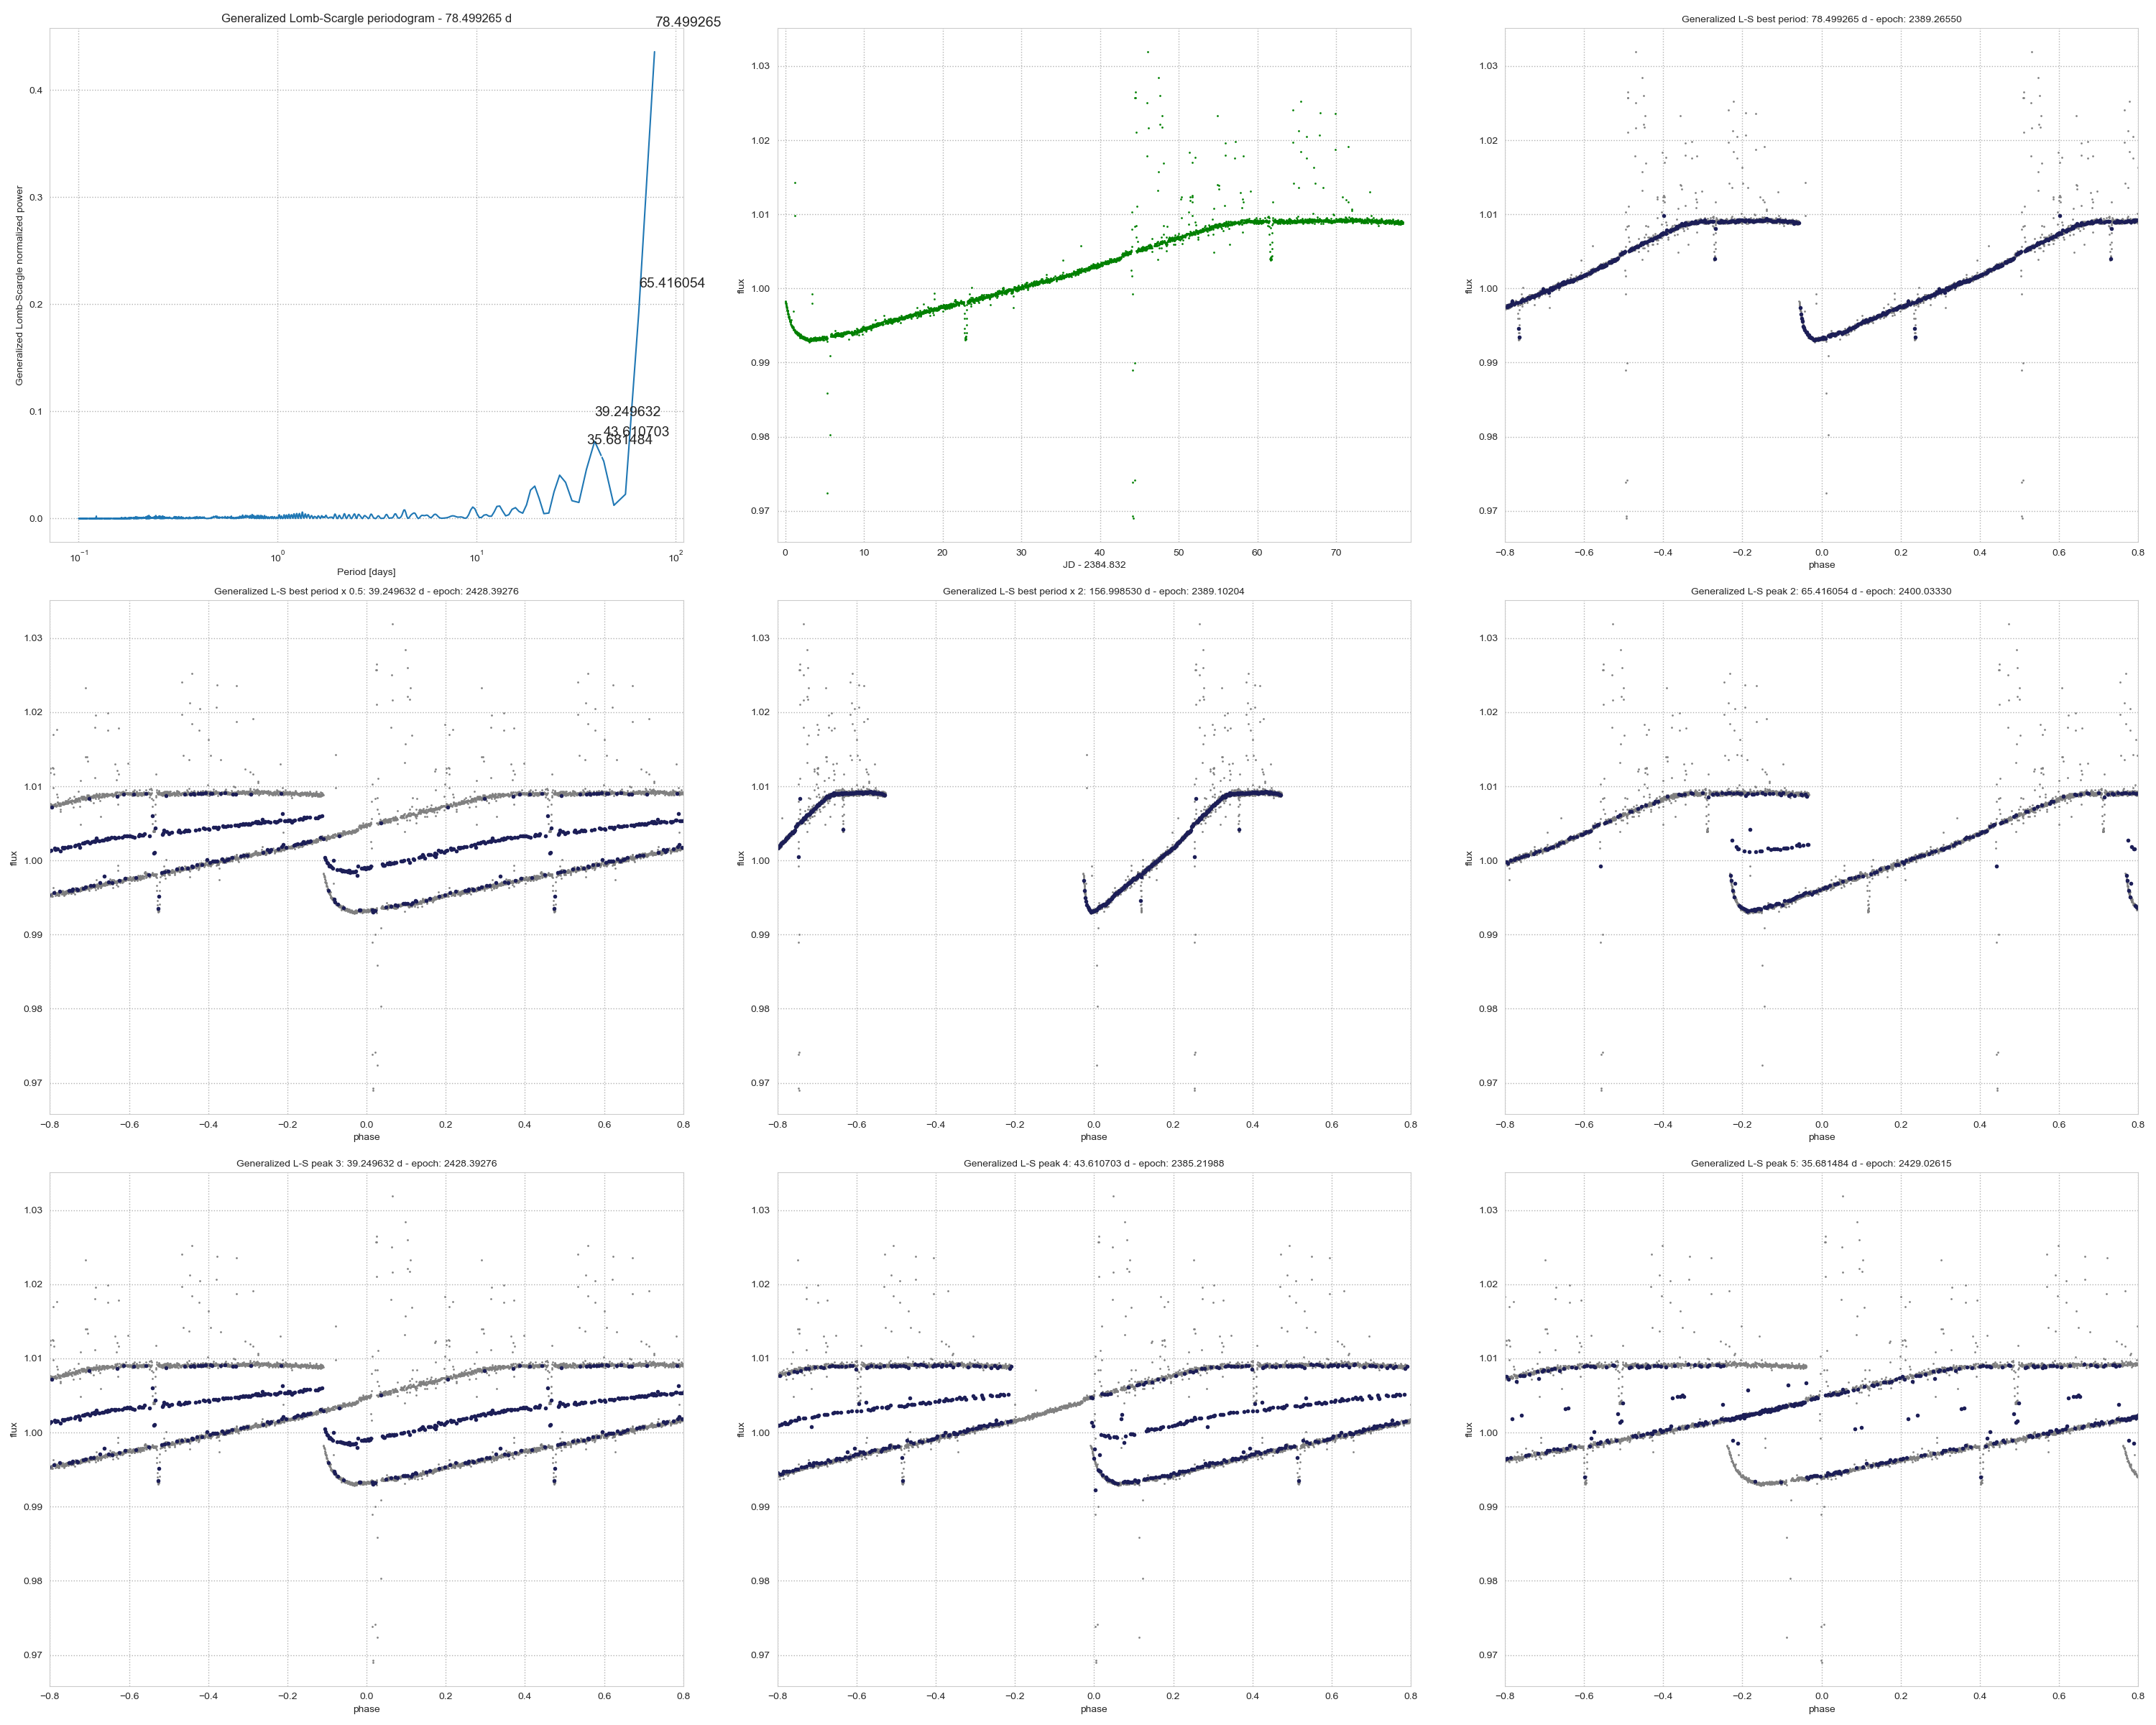

In [12]:
Image('checkplot.png')

In [13]:
glsp

{'bestperiod': 78.49926481800048,
 'bestlspval': 0.43568429752245735,
 'nbestpeaks': 5,
 'nbestlspvals': [0.43568429752245735,
  0.19260914052767195,
  0.07211334668212753,
  0.05353514012508494,
  0.04581702665631937],
 'nbestperiods': [78.49926481800048,
  65.4160540150004,
  39.24963240900024,
  43.61070267666694,
  35.68148400818203],
 'lspvals': array([4.35684298e-01, 1.92609141e-01, 2.27039012e-02, ...,
        5.92159088e-05, 8.98459385e-05, 1.06964430e-04]),
 'omegas': array([ 0.08004133,  0.09604959,  0.11205786, ..., 62.78441673,
        62.80042499, 62.81643326]),
 'periods': array([78.49926482, 65.41605402, 56.07090344, ...,  0.10007555,
         0.10005004,  0.10002455]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}